Objective of project:
- Create a tool which other team members can use to analyse trends in Government Procurement, based on 2015 data and future data.
- Identify high value add procurement opportunities which currently go to foreign companies, but could have gone to local companies.
- Identify insights behind trends in government procurement (e.g. which month of the year do most procurements take place?)


A. Visualisation of data
1. Total number of agencies involved
2. The number of procurements conducted by each agency in 2015
3. The total awarded amount by each agency in 2015
4. The average value each procurement by each agency in 2015
5. Top procurements by value in 2015
6. List out all procurements by specified agency in 2015


B. Cleaning of Dataset
1. Remove supposedly erroneous entries (e.g. expensive catering by DSTA?)


C. Analysis
1. Differentiate amongst different types of procurements (e.g. services, products, value add)
    - a. Clustering
2. Differentiate amongst different types of suppliers (e.g. local companies, foreign incorporated companies, local subsidiaries of foreign companies)
    - a. Clustering
3. Which are the top 5 agencies which conduct high value add procurements

# Initialisation

In [323]:
import pandas as pd

import numpy as np
import csv
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

#Visualisation Libraries
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
pd.set_option('display.max_columns', 5)

%matplotlib inline

# increase default figure and font sizes for easier viewing
#plt.rcParams['figure.figsize'] = (8, 6)
#plt.rcParams['font.size'] = 14

#Open CSV file containing - Singapore Government Procurement Record for 2015
#Source: data.gov.sg
filename = '/Users/xuanrong/mystuff/git/GovtProcurement/government-procurement/government-procurement-via-gebiz-2015.csv'
cols = ['Tender Number', 'Agency', 'Tender Description', 'Award Date', 'Tender Detail Status', 'Supplier Name', 'Total Awarded Amount']
gp_original = pd.read_csv(filename, header=0, names=cols)

#Remove all rows where there was "no awards"
gp_original = gp_original[gp_original['Tender Detail Status'] != 'Awarded to No Suppliers']

million_converter = lambda x: x / 1000000

In [324]:
# Add new column indicating the parent agency

filename_2 = '/Users/xuanrong/mystuff/git/GovtProcurement/Agency_List.csv'
cols_2 = ['Agency','Parent Agency']
gp_parent_agency = pd.read_csv(filename_2, header=0,names=cols_2)
gp = pd.merge(gp_original, gp_parent_agency, on='Agency')

# Information about dataset

In [325]:
gp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5688 entries, 0 to 5687
Data columns (total 8 columns):
Tender Number           5688 non-null object
Agency                  5688 non-null object
Tender Description      5688 non-null object
Award Date              5688 non-null object
Tender Detail Status    5688 non-null object
Supplier Name           5688 non-null object
Total Awarded Amount    5688 non-null float64
Parent Agency           5688 non-null object
dtypes: float64(1), object(7)
memory usage: 399.9+ KB


# Top 10 agencies by number of procurements

In [326]:
#gp_1 = pd.DataFrame(gp['Agency'].value_counts().head(10))
gp_1 = gp['Parent Agency'].value_counts()
pd.DataFrame(gp_1)

,Parent Agency
MOE,1285
MND,683
MTI,615
MCCY,607
MEWR,471
MOT,368
MHA,349
MOH,260
MCI,214
MINDEF,177


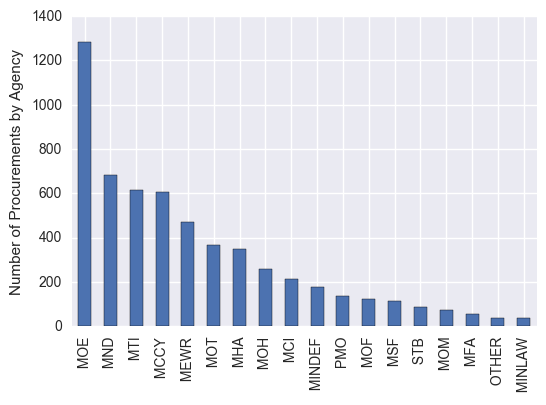

In [327]:
gp_1.plot(kind='bar')
plt.ylabel('Number of Procurements by Agency')

# Top 10 agencies by total value of procurement

In [328]:
gp_2 = pd.DataFrame(gp.groupby('Parent Agency')['Total Awarded Amount'].sum().sort_values(ascending=False))

pd.DataFrame(gp_2['Total Awarded Amount'].apply(million_converter))

,Total Awarded Amount
Parent Agency,
MND,5570.402749
MOT,4649.513911
MHA,2895.877216
MOE,2375.588620
MEWR,1944.593265
MOH,1591.551378
MTI,1565.121428
MINDEF,1033.201927
MCCY,519.266462


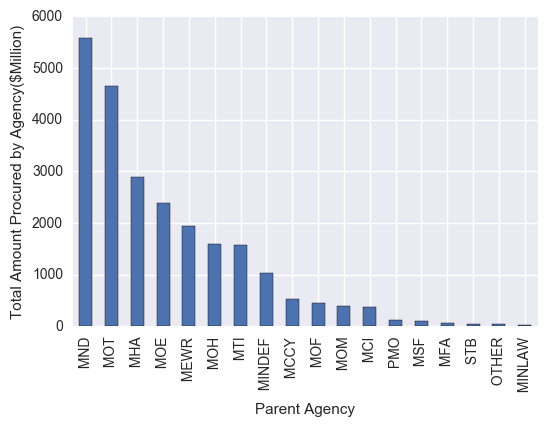

In [329]:
gp_2['Total Awarded Amount'].apply(million_converter).plot(kind='bar')
plt.ylabel('Total Amount Procured by Agency($Million)')

# Top 10 agencies by average value of each procurement

In [330]:
#gp.groupby('Agency')['Total Awarded Amount'].mean().sort_values(ascending=False).head(30)

gp_3 = pd.DataFrame(gp.groupby('Parent Agency')['Total Awarded Amount'].mean().sort_values(ascending=False))

pd.DataFrame(gp_3['Total Awarded Amount'].apply(million_converter))

,Total Awarded Amount
Parent Agency,
MOT,12.634549
MHA,8.297642
MND,8.155787
MOH,6.121351
MINDEF,5.837299
MOM,5.538137
MEWR,4.128648
MOF,3.710096
MTI,2.544913


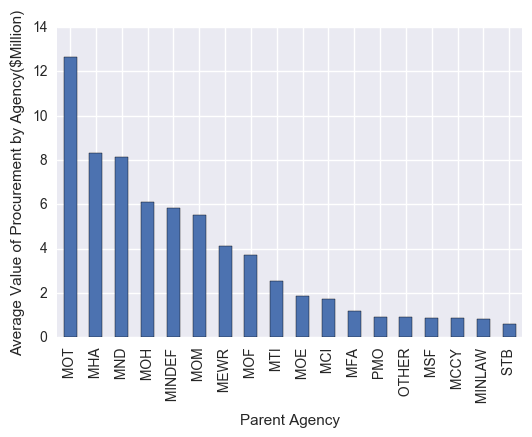

In [331]:
gp_3['Total Awarded Amount'].apply(million_converter).plot(kind='bar')
plt.ylabel('Average Value of Procurement by Agency($Million)')

# Top 10 procurements by value

In [332]:
gp.sort_values('Total Awarded Amount', ascending=False).head(10).drop(['Tender Number', 'Award Date', 'Tender Detail Status'], axis=1)

,Agency,Tender Description,Supplier Name,Total Awarded Amount,Parent Agency
806,Housing and Development Board,Construction And Management Of Staging Ground ...,SANTARLI CONSTRUCTION PTE. LTD.,1.030000e+09,MND
923,Housing and Development Board,Construction And Management Of Staging Ground ...,HYUNDAI ENGINEERING & CONSTRUCTION CO. LTD,6.017260e+08,MND
1197,Ministry of Health-Ministry Headquarter,INVITATION TO TENDER FOR THE PROPOSED ERECTION...,KAJIMA OVERSEAS ASIA PTE LTD,5.958000e+08,MOH
2447,Land Transport Authority,Construction of Marine Parade Station and Tunn...,SAMSUNG C&T CORPORATION,5.553221e+08,MOT
2459,Land Transport Authority,Bus Contracting - Loyang Bus Package,THE GO-AHEAD GROUP PLC,4.977381e+08,MOT
2377,Land Transport Authority,Advanced Work at Depot,GS Engineering & Construction Corp.,4.283010e+08,MOT
2180,Jurong Town Corporation,"Proposed Erection of 2 Blocks of 10-Storey, 3 ...",TIONG SENG CONTRACTORS (PRIVATE) LIMITED,2.772659e+08,MTI
850,Housing and Development Board,Part A : Building Works At Tampines Neighbourh...,CHIP ENG SENG CONTRACTORS (1988) PTE LTD,2.580000e+08,MND
1280,Ministry of Home Affairs-Ministry Headquarter,COMPREHENSIVE MAINTENANCE OF MOTOR VEHICLES,INDECO ENGINEERS (PTE) LTD,2.558512e+08,MHA
1281,Ministry of Home Affairs-Ministry Headquarter,COMPREHENSIVE MAINTENANCE OF MOTOR VEHICLES,SMRT AUTOMOTIVE SERVICES PTE. LTD.,2.558512e+08,MHA


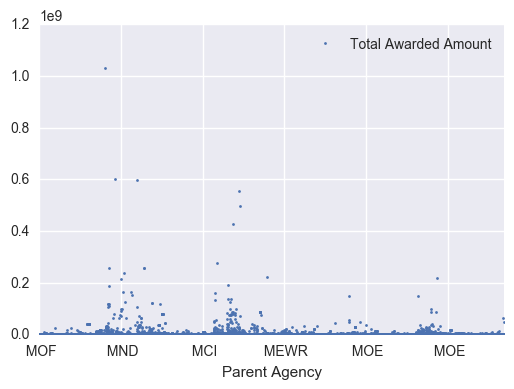

In [333]:
gp.plot('Parent Agency', 'Total Awarded Amount', marker='o', linestyle='', ms=2)

# All procurement by SDC

In [334]:
specified_agency = 'Sentosa Development Corporation'
agency_gp_amount = gp[gp.Agency == specified_agency]['Total Awarded Amount'].sum()
print "%s procured goods and services worth a total of $%d in 2015." % (specified_agency, agency_gp_amount)
gp[gp.Agency == specified_agency][['Tender Description','Supplier Name','Total Awarded Amount']]

Sentosa Development Corporation procured goods and services worth a total of $48144825 in 2015.


,Tender Description,Supplier Name,Total Awarded Amount
5059,INTEGRATED SECURITY SYSTEM FOR SENTOSA ISLAND ...,CA M&E ENGINEERING PTE. LTD.,2781830.00
5060,PROVISION OF CONSULTANCY SERVICES FOR PROPOSED...,AWP PTE. LTD.,710200.00
5061,UPGRADING OF PLATFORM GATE DOOR (PGD) SYSTEM F...,"SHENZHEN FANGDA AUTOMATIC SYSTEM CO., LTD.",770000.00
5062,ENHANCEMENT OF LED LIGHTING AT SENTOSA BOARDWALK,LIGHT10 INDUSTRIES PTE. LTD.,429444.50
5063,PROVISION OF MULTI-DISCIPLINARY CONSULTANCY SE...,GENOME ARCHITECTS,158400.00
5064,"DESIGN, FABRICATION & INSTALLATION OF 2 PASSEN...",JEI FONG ENGINEERING PTE. LTD.,883000.00
5065,TERM CONTRACT FOR SENTOSA GUEST SURVEY FOR A P...,THE NIELSEN COMPANY (SINGAPORE) PTE. LTD.,1077640.00
5066,PROPOSED DESIGN AND BUILD OF ONE SINGLE STOREY...,WEN YI CONSTRUCTION PTE. LTD.,880000.00
5067,PROPOSED DESIGN AND FITTING OUT OF TICKETING C...,ILA GROUP PTE. LTD.,114363.00
5068,"TERM CONTRACT FOR PROVISION OF SECURITY, SAFET...",CERTIS CISCO AUXILIARY POLICE FORCE PTE. LTD.,776377.60
